In [2]:
from IPython.display import IFrame
import pylab as plt
%matplotlib inline
import urllib
# You only need this line if you haven't cloned the repo...if you have cloned, you'll already have the data
urllib.urlretrieve('https://raw.githubusercontent.com/sdrogers/fcmlcode/master/notebooks/data/olympic100m.txt', 'olympic100m.txt')
import numpy as np
# If you have cloned, make sure this is pointing to the correct file, maybe ../data/olympic100m.txt ?
data = np.loadtxt('olympic100m.txt',delimiter=',')
x = data[:,0][:,None]
t = data[:,1][:,None]

## Linear regression in vector and matrix format

In the previous notebook we derived the values of $w_0$ and $w_1$ that minimised the loss. If we modified our model to have a quadratic term:

$$ t_n = w_0 + w_1x_n + w_2x_n $$

resulting in more exciting bendy lines, we could do the same process:

 - Multiply out the squared loss
 - Differentiate with respect to $w_0$, $w_1$ and $w_2$
 - Set to zero
 - Solve the resulting 3 simultaneous equations
 
Life is too short for this. So, we re-pose the problem using *vectors* and *matrices*

## Definitions

We'll start with the linear model again, and define the following:

We first define $\mathbf{w},\mathbf{x}_n$ as:

$$ \mathbf{w} = \left[\begin{array}{c} w_0\\w_1\end{array}\right],~~\mathbf{x}_n = \left[\begin{array}{c} 1 \\ x_n \end{array}\right] $$

and:

$$ \mathbf{t} = \left[\begin{array}{c} t_1\\ t_2\\ \vdots\\ t_N \end{array}\right] $$

and:

$$ \mathbf{X} = \left[\begin{array}{c} \mathbf{x}_1^T \\ \mathbf{x}_2^T \\ \vdots \\ \mathbf{x}_N^T \end{array}\right] = \left[ \begin{array}{cc} 1 & x_1 \\ 1 & x_2 \\ \vdots \\ 1 & x_N \end{array}\right] $$

This might all seem a bit odd (particularly the $\mathbf{X}$), but as you see in the lecture, it means we can write:

$$ \mathbf{t} = \mathbf{X}\mathbf{w} $$

and 

$$ L = \frac{1}{N}(\mathbf{t} - \mathbf{X}\mathbf{w})^T (\mathbf{t} - \mathbf{X}\mathbf{w}) $$

which can be differentiated with respect to $\mathbf{w}$ (as shown in lectures and sketched below) to give the following optimal value of $\mathbf{w}$:

$$ \mathbf{w} = \left(\mathbf{X}^T\mathbf{X}\right)^{-1}\mathbf{X}^T\mathbf{t} $$

In [3]:
IFrame('vec_diff.pdf',width=600,height=300)

We can now construct the various objects we need...

In [4]:
X = np.hstack((np.ones_like(x),x))
t = t # This is already a vector!

And compute $\mathbf{w}$:

In [5]:
XX = np.dot(X.T,X)
invXX = np.linalg.inv(XX)
Xt = np.dot(X.T,t)
w = np.dot(invXX,Xt)
print w

[[  3.64164559e+01]
 [ -1.33308857e-02]]


Now we can print the results. To do so, we need to create a matrix of test points in the same format as $\mathbf{X}$ above (people often get stuck here!)

In [6]:
testx = np.linspace(1896,2012,100)[:,None]
testX = np.hstack((np.ones_like(testx),testx))
testt = np.dot(testX,w)

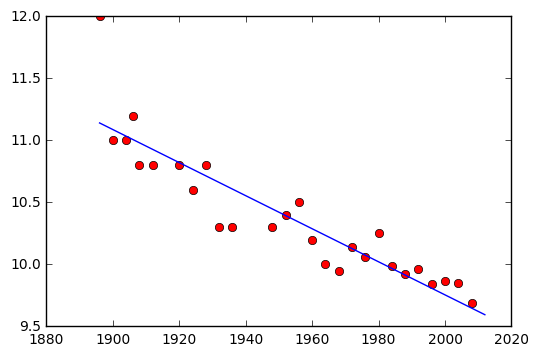

In [7]:
plt.figure()
plt.plot(x,t,'ro')
plt.plot(testx,testt,'b')

Phew again -- it looks just like the old version. So, what's the point?

Well, to add, say, an $x^2$ term we just need to add a column to $\mathbf{X}$ (and the test version):

$$ \mathbf{x}_n = \left[\begin{array}{c} 1 \\ x_n \\ x_n^2 \end{array}\right] $$

$$ \mathbf{X} = \left[ \begin{array}{c} \mathbf{x}_1 \\ \mathbf{x}_2 \\ \vdots \\ \mathbf{x}_N\end{array}\right] = \left[ \begin{array}{ccc} 1 & x_1 & x_1^2 \\ 1 & x_2 & x_2^2 \\ \vdots & \vdots & \vdots \\ 1 & x_N & x_N^2 \end{array}\right] $$

The equation for $\mathbf{w}$ doesn't change **at all**:

In [8]:
X = np.hstack((np.ones_like(x),x,x**2))
XX = np.dot(X.T,X)
invXX = np.linalg.inv(XX)
Xt = np.dot(X.T,t)
w = np.dot(invXX,Xt)
print w

[[  4.55597856e+02]
 [ -4.43160485e-01]
 [  1.10151552e-04]]


In [9]:
testx = np.linspace(1896,2012,100)[:,None]
testX = np.hstack((np.ones_like(testx),testx,testx**2))
testt = np.dot(testX,w)

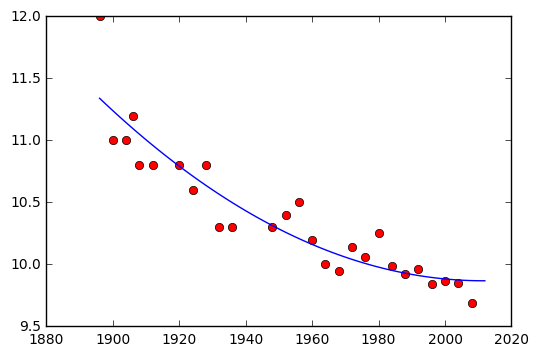

In [10]:
plt.figure()
plt.plot(x,t,'ro')
plt.plot(testx,testt,'b')

Bendy!

### Appendix: solving linear systems

Our expression for the optimal value of $\mathbf{w}$ is:

$$ \mathbf{w} = \left(\mathbf{X}^T\mathbf{X}\right)^{-1}\mathbf{X}^T\mathbf{t} $$

Above, we have computed this by writing code to compute the right hand side. This involves performing a matrix inversion *which is almost always something to avoid* (as the matrix gets bigger, this becomes time consuming and numerically innacurate).

Instead, we can go back a step to this equation:

$$ \mathbf{X}^T\mathbf{X}\mathbf{w} = \mathbf{X}^T \mathbf{t} $$

This is a system of linear equations (in general: $\mathbf{A}\mathbf{z} = \mathbf{B}$) and we can solve this directly for $\mathbf{w}$ using `numpy.linalg.solve`:

In [11]:
XX = np.dot(X.T,X)
Xt = np.dot(X.T,t)
w = np.linalg.solve(XX,Xt)

In [12]:
print w

[[  4.55597856e+02]
 [ -4.43160485e-01]
 [  1.10151552e-04]]


For this system, it doesn't make any difference, but you don't have to get much bigger to see a difference.